# **Knowledge Based Topic Retrieval for Recommendations and Tourism Promotions**

Technical Steps
1. Get data from Tripadvisor✅
2. Preparing Environment✅
3. Data pre-processing✅
<ul>
  <li>Case Folding✅</li>
  <li>Tokenization✅</li>
  <li>Remove Slang✅</li>
  <li>Stem✅</li>
  <li>Stopword Removal✅</li>
  <li>Rejoin✅</li>
</ul>
4. Feature Engineering
<ul>
  <li>Vectorization✅</li>
  <li>Normalization Using MaxAbsScaler✅</li>
</ul>
5. Review Stars Classification
<ul>
  <li>Random Forest✅</li>
  <li>Decision Tree✅</li>
  <li>Logistic Regression✅</li>
  <li>K-NN✅</li>
  <li>Support Vector Machine✅</li>
</ul>
6. Clustering and Elbow Method✅
7. Modeling with LDA, NMF, K-Means Clustering✅
8. Record Values from Dataset


## 1. Get Data from Tripadvisor

Data gathered by using Webscapper.io from top 30 Hotel in Tripadvisor

## 2. Preparing Environment

In [ ]:
# 2.1. Mount Google Drive and default dataset path
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Python/Dataset/'

In [1]:
# 2.2. Install Sastrawi
!pip install Sastrawi
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install nltk
!pip install wordcloud
!pip install --upgrade pillow
!pip install sklearn
!pip install imblearn
!pip install yellowbrick
!pip install lda

  Using cached lda-2.0.0.tar.gz (320 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for lda
Failed to build lda


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [53 lines of output]
  C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\setuptools\dist.py:773: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    % (opt, underscore_opt)
  C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\setuptools\dist.py:773: UserWarning: Usage of dash-separated 'author-email' will not be supported in future versions. Please use the underscore name 'author_email' instead
    % (opt, underscore_opt)
  C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\setuptools\dist.py:773: UserWarning: Usage of dash-separated 'pre-hook.sdist_pre_hook' will not be supported in future versions. Please use the underscore name 'pre_hook.sdist_pre_hook' instead
    % (opt, underscore_opt)
  C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\setu

In [3]:
# 2.3. Import Installed Library
import time
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import glob
import os
import sys
from ast import literal_eval
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import wordcloud
from wordcloud import WordCloud

warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tinob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tinob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
path = os.getcwd()+'/Dataset/'

In [ ]:
# 2.4. Import Data
slang_df = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')


# Combine All Hotel CSV from Google Drive 'Dataset' folder
hotel_csv = os.path.join(path, '*.csv')
joined_review = glob.glob(hotel_csv)

hotel_df = pd.concat(map(pd.read_csv, joined_review), ignore_index=True)

In [ ]:
hotel_df.info()

In [ ]:
# Drop Unnecessary Column
hotel_df = hotel_df.drop(hotel_df.columns[0], axis = 1)

In [ ]:
hotel_df.head()

In [ ]:
slang_df.head()

## 3. Data Preprocessing

In [4]:
# 3.1. Case Folding
hotel_df['review'] = hotel_df['review'].str.lower()

NameError: name 'hotel_df' is not defined

In [ ]:
# 3.2. Tokenization
def tokenizeWords(s, remove_punctuation=True):
  if remove_punctuation == True:
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|S+')
    clean_words = tokenizer.tokenize(s)
  else:
    clean_words = nltk.word_tokenize(s)
  return clean_words

hotel_df['tokenized'] = hotel_df['review'].apply(tokenizeWords)
tokenized = pd.DataFrame({'review' : hotel_df['review'], 'tokenized' : hotel_df['review'].apply(tokenizeWords)})

In [ ]:
# 3.3. Remove Slang
# Remove trailing whitespace
slang_df['slang'] = slang_df['slang'].apply(lambda x:x.strip())
slang_df['formal'] = slang_df['formal'].apply(lambda x:x.strip())

In [ ]:
# Transform into key value pairs in a dict
slang_dict = {}
for idx, row in slang_df.iterrows():
  slang_dict.update({row['slang']: row['formal']})

def replaceSlang(tokens):
  for i, word in enumerate(tokens):
    try:
      tokens[i] = slang_dict[word]
    except:
      KeyError
  return tokens

no_slang = pd.DataFrame({'review' : hotel_df['review'], 'no_slang' : tokenized['tokenized'].apply(replaceSlang)})
hotel_df = pd.merge(hotel_df, no_slang, on='review')

In [ ]:
hotel_df.head(20)

In [ ]:
# 3.4. Stem
def stemWords(tokens):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    return [stemmer.stem(t) for t in tokens]

hotel_df['stemmed'] = hotel_df['no_slang'].apply(stemWords)

**Proses Stem memakan waktu yang sangat lama. Untuk memangkas waktu, peneliti sudah membuat dataset dimana proses stem telah selesai.**

In [5]:
hotel_df = pd.read_csv('stemmed.csv')
hotel_df = hotel_df.drop(hotel_df.columns[0], axis = 1)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21674 entries, 0 to 21673
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   hotel      21674 non-null  object
 1   review     21674 non-null  object
 2   stars      21674 non-null  int64 
 3   tokenized  21674 non-null  object
 4   no_slang   21674 non-null  object
 5   stemmed    21674 non-null  object
dtypes: int64(1), object(5)
memory usage: 1016.1+ KB


In [6]:
hotel_df.head(10)

,hotel,review,stars,tokenized,no_slang,stemmed
0,Adiwana Bisma,"liburan keluarga yg nyaman, kolam renang yg ba...",5,"['liburan', 'keluarga', 'yg', 'nyaman', 'kolam...","['liburan', 'keluarga', 'yang', 'nyaman', 'kol...","['libur', 'keluarga', 'yang', 'nyaman', 'kolam..."
1,Adiwana Bisma,hotelnya bagus banget dan pelayanannya sangat ...,5,"['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotel', 'bagus', 'banget', 'dan', 'layan', '..."
2,Adiwana Bisma,saya menginap di adiwana bisma bersama pasanga...,5,"['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'inap', 'di', 'adiwana', 'bisma', 'sa..."
3,Adiwana Bisma,"hotelnya bagus banget, bersih dan lengkap fasi...",5,"['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotel', 'bagus', 'banget', 'bersih', 'dan', ..."
4,Adiwana Bisma,weekend di adiwana bisma stay selama two night...,5,"['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ..."
5,Adiwana Bisma,stay one night bareng keluarga sangat menyenan...,5,"['stay', 'one', 'night', 'bareng', 'keluarga',...","['stay', 'one', 'night', 'bareng', 'keluarga',...","['stay', 'one', 'night', 'bareng', 'keluarga',..."
6,Adiwana Bisma,daycation di adiwana bisma sangat menyenangkan...,5,"['daycation', 'di', 'adiwana', 'bisma', 'sanga...","['daycation', 'di', 'adiwana', 'bisma', 'sanga...","['daycation', 'di', 'adiwana', 'bisma', 'sanga..."
7,Adiwana Bisma,"hotelnya masih terbilang baru, ada restaurantn...",5,"['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","['hotel', 'masih', 'bilang', 'baru', 'ada', 'r..."
8,Adiwana Bisma,thank you so much buat pelayanan yang ramah da...,5,"['thank', 'you', 'so', 'much', 'buat', 'pelaya...","['thank', 'you', 'sok', 'much', 'buat', 'pelay...","['thank', 'you', 'sok', 'much', 'buat', 'layan..."
9,Adiwana Bisma,"kamar hotel yang besar, bersih dan mewah, ling...",5,"['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","['kamar', 'hotel', 'yang', 'besar', 'bersih', ..."


In [7]:
# Fixing 'stemmed' column structure after converting to CSV file
hotel_df['stemmed'] = hotel_df['stemmed'].apply(literal_eval)

In [8]:
# 3.5. Stopword Removal
nltk_lib = stopwords.words('indonesian')

# Additional words from GitHub for NLTK Stopwords 
add_words = open('add_stopwords.txt', 'r')
data = add_words.read()
list_add_words = data.split('\n')
add_words.close()

custom_words = [
    'hotel',
    'resort',
    'hotel',
    'inap',
    'stay',
    'villa',
    'resor',
    'banget',
    'night',
    'bal',
    'n',
    'ju',
    'two',
    'libur',
    'staf',
    'dtype',
    'Name',
    'object',
    'Length',
    'udaya',
    'nya',
    'final',
    'nginep',
    'kalo',
    'mulaidari',
    'istri',
    'milik',
    'the',
    
]

stops = nltk_lib + list_add_words + custom_words

In [9]:
def removeStopWords(tokens):
    return [t for t in tokens if t not in stops]

In [10]:
hotel_df['cleaned'] = hotel_df['stemmed'].apply(removeStopWords)

In [11]:
hotel_df.head(30)

,hotel,review,stars,tokenized,no_slang,stemmed,cleaned
0,Adiwana Bisma,"liburan keluarga yg nyaman, kolam renang yg ba...",5,"['liburan', 'keluarga', 'yg', 'nyaman', 'kolam...","['liburan', 'keluarga', 'yang', 'nyaman', 'kol...","[libur, keluarga, yang, nyaman, kolam, renang,...","[keluarga, nyaman, kolam, renang, bagus, kamar..."
1,Adiwana Bisma,hotelnya bagus banget dan pelayanannya sangat ...,5,"['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","[hotel, bagus, banget, dan, layan, sangat, bai...","[bagus, layan, suka, tingkat, layan, unjung]"
2,Adiwana Bisma,saya menginap di adiwana bisma bersama pasanga...,5,"['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'menginap', 'di', 'adiwana', 'bisma',...","[saya, inap, di, adiwana, bisma, sama, pasang,...","[adiwana, bisma, pasang, kamar, bersih, luas, ..."
3,Adiwana Bisma,"hotelnya bagus banget, bersih dan lengkap fasi...",5,"['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","[hotel, bagus, banget, bersih, dan, lengkap, f...","[bagus, bersih, lengkap, fasilitas, poolnya, c..."
4,Adiwana Bisma,weekend di adiwana bisma stay selama two night...,5,"['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","[weekend, di, adiwana, bisma, stay, lama, two,...","[weekend, adiwana, bisma, senang, puas, layan,..."
5,Adiwana Bisma,stay one night bareng keluarga sangat menyenan...,5,"['stay', 'one', 'night', 'bareng', 'keluarga',...","['stay', 'one', 'night', 'bareng', 'keluarga',...","[stay, one, night, bareng, keluarga, sangat, s...","[one, bareng, keluarga, senang, kamar, luas, v..."
6,Adiwana Bisma,daycation di adiwana bisma sangat menyenangkan...,5,"['daycation', 'di', 'adiwana', 'bisma', 'sanga...","['daycation', 'di', 'adiwana', 'bisma', 'sanga...","[daycation, di, adiwana, bisma, sangat, senang...","[daycation, adiwana, bisma, senang, staffnya, ..."
7,Adiwana Bisma,"hotelnya masih terbilang baru, ada restaurantn...",5,"['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","[hotel, masih, bilang, baru, ada, restaurantny...","[bilang, restaurantnya, roomnya, luas, bersih,..."
8,Adiwana Bisma,thank you so much buat pelayanan yang ramah da...,5,"['thank', 'you', 'so', 'much', 'buat', 'pelaya...","['thank', 'you', 'sok', 'much', 'buat', 'pelay...","[thank, you, sok, much, buat, layan, yang, ram...","[thank, you, sok, much, layan, ramah, staff, k..."
9,Adiwana Bisma,"kamar hotel yang besar, bersih dan mewah, ling...",5,"['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","[kamar, hotel, yang, besar, bersih, dan, mewah...","[kamar, bersih, mewah, lingkung, desa, asri, s..."


In [13]:
# 3.6. Rejoin Token

def rejoinToken(token):
    return (' '.join(t for t in token))


hotel_df['final'] = hotel_df['cleaned'].apply(rejoinToken)

In [14]:
hotel_df

,hotel,review,stars,tokenized,no_slang,stemmed,cleaned,final
0,Adiwana Bisma,"liburan keluarga yg nyaman, kolam renang yg ba...",5,"['liburan', 'keluarga', 'yg', 'nyaman', 'kolam...","['liburan', 'keluarga', 'yang', 'nyaman', 'kol...","[libur, keluarga, yang, nyaman, kolam, renang,...","[keluarga, nyaman, kolam, renang, bagus, kamar...",keluarga nyaman kolam renang bagus kamar bersi...
1,Adiwana Bisma,hotelnya bagus banget dan pelayanannya sangat ...,5,"['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","[hotel, bagus, banget, dan, layan, sangat, bai...","[bagus, layan, suka, tingkat, layan, unjung]",bagus layan suka tingkat layan unjung
2,Adiwana Bisma,saya menginap di adiwana bisma bersama pasanga...,5,"['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'menginap', 'di', 'adiwana', 'bisma',...","[saya, inap, di, adiwana, bisma, sama, pasang,...","[adiwana, bisma, pasang, kamar, bersih, luas, ...",adiwana bisma pasang kamar bersih luas kasih f...
3,Adiwana Bisma,"hotelnya bagus banget, bersih dan lengkap fasi...",5,"['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","[hotel, bagus, banget, bersih, dan, lengkap, f...","[bagus, bersih, lengkap, fasilitas, poolnya, c...",bagus bersih lengkap fasilitas poolnya cantik ...
4,Adiwana Bisma,weekend di adiwana bisma stay selama two night...,5,"['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","[weekend, di, adiwana, bisma, stay, lama, two,...","[weekend, adiwana, bisma, senang, puas, layan,...",weekend adiwana bisma senang puas layan staff ...
...,...,...,...,...,...,...,...,...
21669,The Udaya Resort & Spa,villa pribadi yang menakjubkan dengan kolam re...,5,"['villa', 'pribadi', 'yang', 'menakjubkan', 'd...","['villa', 'pribadi', 'yang', 'menakjubkan', 'd...","[villa, pribadi, yang, takjub, dengan, kolam, ...","[pribadi, takjub, kolam, renang, ubud, damai, ...",pribadi takjub kolam renang ubud damai layak t...
21670,The Udaya Resort & Spa,"hotel terbaik di bali untuk bulan madu anda, c...",5,"['hotel', 'terbaik', 'di', 'bali', 'untuk', 'b...","['hotel', 'terbaik', 'di', 'bali', 'untuk', 'b...","[hotel, baik, di, bal, untuk, bulan, madu, and...","[madu, cuaca, sempurna, fasilitas, bagus, pand...",madu cuaca sempurna fasilitas bagus pandang in...
21671,The Udaya Resort & Spa,udaya resort and spa adalah tempat yang cocok ...,4,"['udaya', 'resort', 'and', 'spa', 'adalah', 't...","['udaya', 'resort', 'and', 'spa', 'adalah', 't...","[udaya, resort, and, spa, adalah, tempat, yang...","[and, spa, cocok, santa, keluarga, buah, kolam...",and spa cocok santa keluarga buah kolam renang...
21672,The Udaya Resort & Spa,resort yang luar biasa dengan layanan premium ...,5,"['resort', 'yang', 'luar', 'biasa', 'dengan', ...","['resort', 'yang', 'luar', 'biasa', 'dengan', ...","[resort, yang, luar, biasa, dengan, layan, pre...","[layan, premium, properti, bisnis, temu, kulin...",layan premium properti bisnis temu kuliner lez...


## Word Cloud Viz

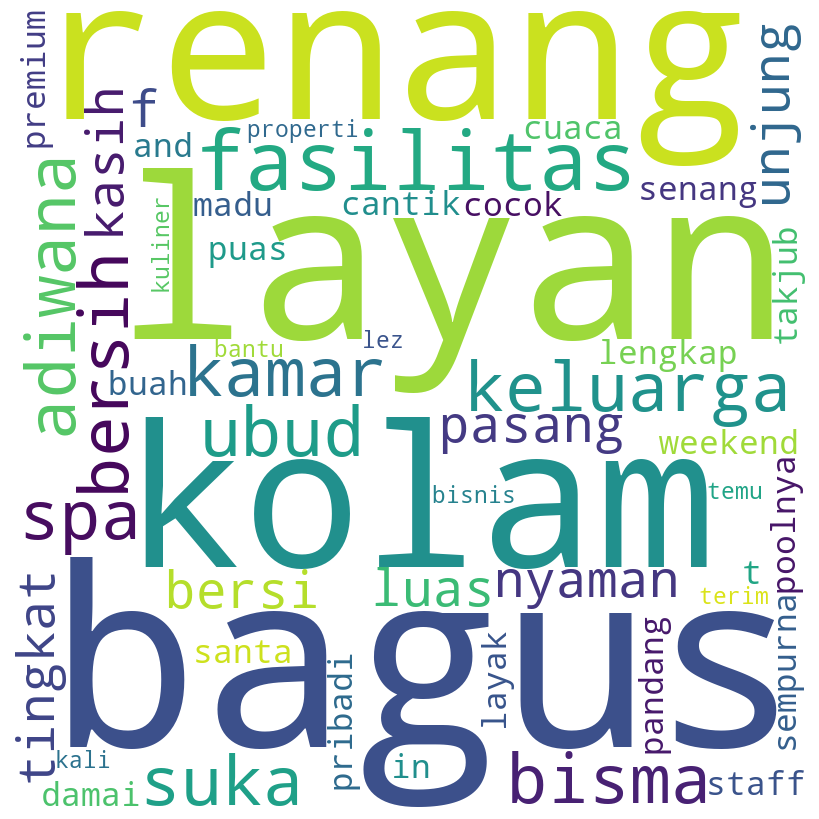

In [15]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stops,
                min_font_size = 10).generate(str(hotel_df['final']))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [16]:
contain_values = hotel_df[hotel_df['final'].str.contains('nanda')]
print(contain_values)

                                 hotel  \
1672            Amadea Resort & Villas   
5637   Bali Mandira Beach Resort & Spa   
8846              Grand Zuri Kuta Bali   
8916              Grand Zuri Kuta Bali   
8929              Grand Zuri Kuta Bali   
8944              Grand Zuri Kuta Bali   
8945              Grand Zuri Kuta Bali   
8950              Grand Zuri Kuta Bali   
8951              Grand Zuri Kuta Bali   
8964              Grand Zuri Kuta Bali   
8973              Grand Zuri Kuta Bali   
8974              Grand Zuri Kuta Bali   
8975              Grand Zuri Kuta Bali   
8976              Grand Zuri Kuta Bali   
8980              Grand Zuri Kuta Bali   
8985              Grand Zuri Kuta Bali   
8991              Grand Zuri Kuta Bali   
8993              Grand Zuri Kuta Bali   
9002              Grand Zuri Kuta Bali   
9005              Grand Zuri Kuta Bali   
9019              Grand Zuri Kuta Bali   
9026              Grand Zuri Kuta Bali   
9063              Grand Zuri Kuta 

## 4. Feature Engineering


In [13]:
## 4.1. Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
final_text = hotel_df.copy()
final_text = final_text[['hotel', 'review', 'final', 'stars']]

In [15]:
final_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21674 entries, 0 to 21673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hotel   21674 non-null  object
 1   review  21674 non-null  object
 2   final   21674 non-null  object
 3   stars   21674 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 677.4+ KB


In [16]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(final_text['final'])

In [17]:
## 4.2. Normalization
# We use MaxAbsScaler to normalize sparse data
from sklearn.preprocessing import MaxAbsScaler
scaling = MaxAbsScaler()

features_scaled = scaling.fit_transform(features)

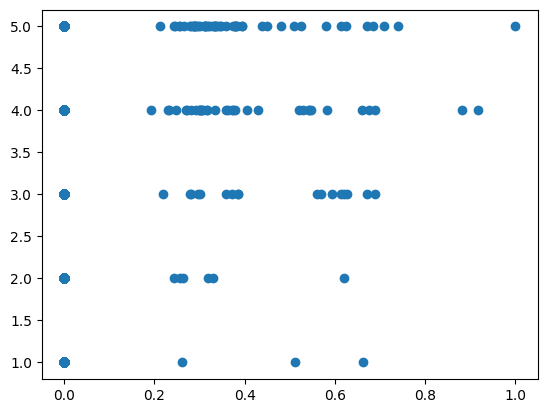

In [18]:
plt.scatter(features_scaled[:, 0].toarray(), final_text['stars'])

In [19]:
# Spliting Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score, balanced_accuracy_score
from sklearn.datasets import make_classification

X = features_scaled
y = final_text['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
y_train.value_counts()

5    12245
4     3685
3      935
2      303
1      171
Name: stars, dtype: int64

## 5. Review Stars Classification

In [37]:
# Import Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [38]:
clf_model = {
    'rfc' : RandomForestClassifier(),
    'dts' : tree.DecisionTreeClassifier(),
    'lor' : LogisticRegression(),
    'knn' : KNeighborsClassifier(),
    'svm' : SVC(),
}

In [39]:
scores = []
for model_name in clf_model:
    clf = clf_model[model_name]
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    scores.append({
        'model' : model_name,
        'accuracy' : round(accuracy_score(y_test, y_pred), 3),
    })

In [36]:
df_without_tuning = pd.DataFrame(scores)
df_without_tuning

,model,accuracy
0,rfc,0.704
1,dts,0.629
2,lor,0.717
3,knn,0.691
4,svm,0.716


In [40]:
lor_tuned = RandomizedSearchCV(LogisticRegression(), {
    'C' : [x for x in np.linspace(1e-9, 1, 5)],
    'random_state' : [x for x in range(1, 43, 5)],
    'solver' : ['lbfgs', 'saga', 'newton_cg','sag'],
    'max_iter' : [x for x in range(100, 1000, 200)]
})

lor_tuned.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1e-09, 0.25000000075,
                                              0.5000000005, 0.75000000025,
                                              1.0],
                                        'max_iter': [100, 300, 500, 700, 900],
                                        'random_state': [1, 6, 11, 16, 21, 26,
                                                         31, 36, 41],
                                        'solver': ['lbfgs', 'saga', 'newton_cg',
                                                   'sag']})

In [41]:
lor_df = pd.DataFrame(lor_tuned.cv_results_)
lor_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_random_state,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,5.952066,0.140645,0.001795,0.000400,saga,36,300,0.25,"{'solver': 'saga', 'random_state': 36, 'max_iter': 300, 'C': 0.25000000075}",0.734141,0.738466,0.727797,0.729527,0.726276,0.731241,0.004473,1
0,1.981949,0.189069,0.001596,0.000490,sag,16,900,0.5,"{'solver': 'sag', 'random_state': 16, 'max_iter': 900, 'C': 0.5000000005}",0.730392,0.741926,0.722895,0.726644,0.727718,0.729915,0.006470,2
2,7.314802,0.805432,0.001609,0.000487,saga,26,900,0.75,"{'solver': 'saga', 'random_state': 26, 'max_iter': 900, 'C': 0.75000000025}",0.729527,0.740773,0.718570,0.720877,0.724546,0.726858,0.007881,3
6,2.290947,0.072416,0.001994,0.000630,lbfgs,41,100,1.0,"{'solver': 'lbfgs', 'random_state': 41, 'max_iter': 100, 'C': 1.0}",0.730392,0.739043,0.717993,0.718281,0.718777,0.724897,0.008476,4
4,3.150062,0.231998,0.002202,0.000398,lbfgs,31,900,1.0,"{'solver': 'lbfgs', 'random_state': 31, 'max_iter': 900, 'C': 1.0}",0.730392,0.738754,0.717128,0.718858,0.718777,0.724782,0.008443,5
9,3.208715,0.265034,0.001802,0.000403,lbfgs,26,300,1.0,"{'solver': 'lbfgs', 'random_state': 26, 'max_iter': 300, 'C': 1.0}",0.730392,0.738754,0.717128,0.718858,0.718777,0.724782,0.008443,5
7,1.781640,0.034037,0.001398,0.000488,sag,6,100,1.0,"{'solver': 'sag', 'random_state': 6, 'max_iter': 100, 'C': 1.0}",0.730392,0.738754,0.717128,0.718570,0.718777,0.724724,0.008484,7
8,1.258330,0.150599,0.001805,0.000407,lbfgs,1,100,0.0,"{'solver': 'lbfgs', 'random_state': 1, 'max_iter': 100, 'C': 1e-09}",0.706171,0.706171,0.706171,0.706171,0.706374,0.706211,0.000081,8
1,0.002792,0.000746,0.000000,0.000000,newton_cg,31,700,0.5,"{'solver': 'newton_cg', 'random_state': 31, 'max_iter': 700, 'C': 0.5000000005}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,0.002785,0.000381,0.000000,0.000000,newton_cg,1,500,0.0,"{'solver': 'newton_cg', 'random_state': 1, 'max_iter': 500, 'C': 1e-09}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [24]:
lor = LogisticRegression(solver='saga', random_state=11, max_iter=100, C=0.25, multi_class='ovr')
lor.fit(X_train, y_train)

y_pred = lor.predict(X_test)

print('Model Accuracy after Tuning: %.2f ' % (accuracy_score(y_test, y_pred) * 100 ))

Model Accuracy after Tuning: 72.58 


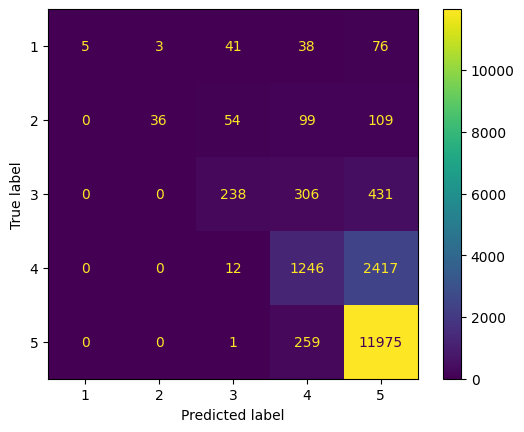

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lor, X_train, y_train)
plt.show()

In [103]:
all_result = lor.predict(X)

In [104]:
final_text['pred'] = all_result

In [30]:
pd.set_option('display.max_colwidth', None)

In [106]:
final_text.loc[final_text['pred'] == 1]

,final,stars,pred
1817,minyak 10 salah tinggal kualitas kali putus cabang coba alam keri 1 jalan upgrade deluxe poolside terrace buruk kamar lusuh milik kombinasi pintu hubung kamar belah 2 indak putus meng upgrade indah tipu muslihat bayar biaya celaka 3 rd check out biaya buruk pergi tanda terima henti 200 4 check out,1,1
2359,unjung amadea keselumhan ekonomis populer bulu kunjung alam kecewa sore terima panggil telepon meja paket ngantarkarnya kamar biaya 2 juta rupiah perintah tingkat tipu bingung stres sikeras wanita pintu kamar paket tolak lina sang manajer hubung tamu telepon maaf kejut ulang maaf,1,1
10832,alam buruk bintang 7 hard rock keluarga buka 7 kamar chekout pemberitahuan denda 980 us dolar noda karpet harga fantastis ukur karpet 2x2 meter kelas bintang 4 karpet denda seprei lantai kena serpih tinta tatto temporari denda masuk akal list sedia kamar2 karpet noda diameter 2 mm akibat serpih tatto lucu noda kamar wajar kena denda kemdian,1,1
11229,kecewa hard rock ruang milik bau keri gelap suram kotor keluh pindah ruang bersih gelap suram kamar pergi anak sakit milik energi ubah mes layan kamar keri pergi beli makan toko mini lucu layan kamar telepon lihat makan hapus akun laku tunggu hubung layan kamar periksa,1,1
13776,mes mes jalan lihat lelah sedih pilar tradisional indah rusak patah batu bata rumput tumbuh lihat abai kamar diberitahu pergi makan siang kafe pasang kafe suami mes sup jamur sayur udang pesan bungkus pita buah tusuk daging kentang goreng tunggu 20 menit makan maaf tunggu sup beku tunggu til dingin keri ajar potong kentang udang mayones,1,1


## 6. Find Optimal K with Elbow Method

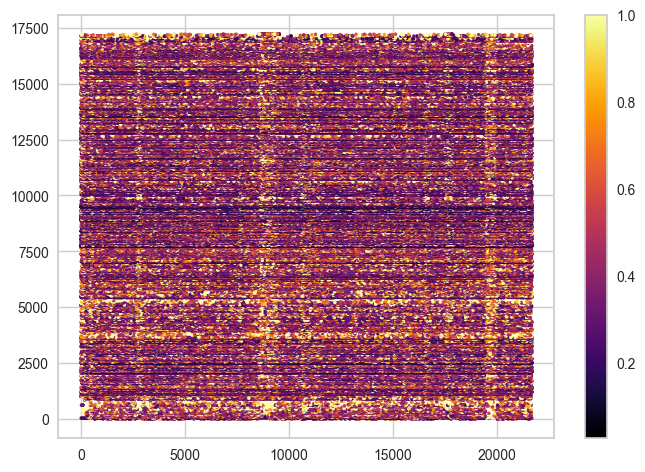

In [80]:
X_dict = X.todok()
xy = np.array(list(X_dict.keys()))
vals = np.array(list(X_dict.values()))

# create a scatter plot
plt.scatter(xy[:,0], xy[:,1], s=5, c=vals, cmap='inferno')
plt.colorbar()
plt.show()

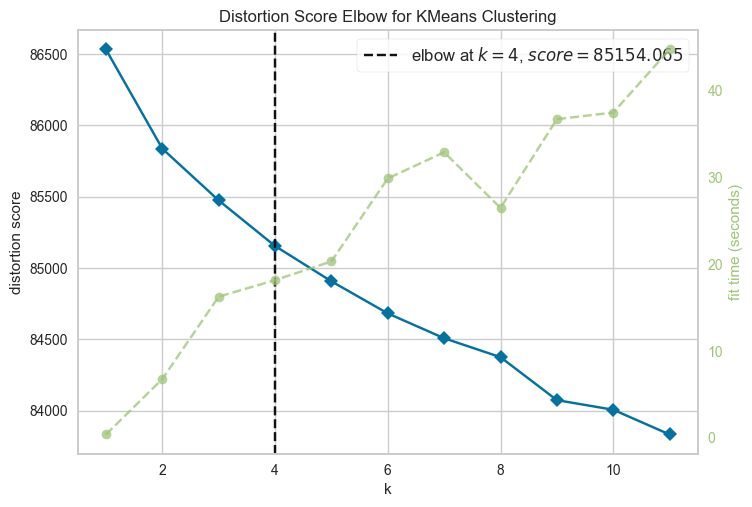

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

optimum_K = KElbowVisualizer(KMeans(), k=(1,12))

optimum_K.fit(X)
optimum_K.show()

## 7. Modeling with NMF & LDA

1. Facility
2. Access
3. Service
4. Food

In [21]:
## NMF
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=4)
nmf_model.fit(X)

NMF(n_components=4)

In [22]:
for index, topic in enumerate(nmf_model.components_):
    print(f'TOP 10 WORDS FOR TOPIC # {index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')
    

TOP 10 WORDS FOR TOPIC # 0
['buah', 'makan', 'tidur', 'mandi', 'indah', 'sarap', 'ubud', 'tinggal', 'malam', 'kamar']


TOP 10 WORDS FOR TOPIC # 1
['keluarga', 'pantai', 'indah', 'dewasa', 'sarap', 'bagus', 'bar', 'anak', 'renang', 'kolam']


TOP 10 WORDS FOR TOPIC # 2
['bagus', 'menit', 'belanja', 'minyak', 'toko', 'pantai', 'lokasi', 'restoran', 'kaki', 'jalan']


TOP 10 WORDS FOR TOPIC # 3
['keluarga', 'staff', 'kamar', 'bagus', 'nyaman', 'enak', 'fasilitas', 'bersih', 'layan', 'ramah']




In [23]:
topic_res = nmf_model.transform(features)

In [24]:
topic_res.argmax(axis=1)

array([3, 3, 3, ..., 1, 3, 3], dtype=int64)

In [25]:
final_text['Topic'] = topic_res.argmax(axis=1)

In [26]:
final_text

,hotel,review,final,stars,Topic
0,Adiwana Bisma,"liburan keluarga yg nyaman, kolam renang yg ba...",keluarga nyaman kolam renang bagus kamar bersi...,5,3
1,Adiwana Bisma,hotelnya bagus banget dan pelayanannya sangat ...,bagus layan suka tingkat layan unjung,5,3
2,Adiwana Bisma,saya menginap di adiwana bisma bersama pasanga...,adiwana bisma pasang kamar bersih luas kasih f...,5,3
3,Adiwana Bisma,"hotelnya bagus banget, bersih dan lengkap fasi...",bagus bersih lengkap fasilitas poolnya cantik ...,5,3
4,Adiwana Bisma,weekend di adiwana bisma stay selama two night...,weekend adiwana bisma senang puas layan staff ...,5,3
...,...,...,...,...,...
21669,The Udaya Resort & Spa,villa pribadi yang menakjubkan dengan kolam re...,pribadi takjub kolam renang ubud damai layak t...,5,0
21670,The Udaya Resort & Spa,"hotel terbaik di bali untuk bulan madu anda, c...",madu cuaca sempurna fasilitas bagus pandang in...,5,1
21671,The Udaya Resort & Spa,udaya resort and spa adalah tempat yang cocok ...,and spa cocok santa keluarga buah kolam renang...,4,1
21672,The Udaya Resort & Spa,resort yang luar biasa dengan layanan premium ...,layan premium properti bisnis temu kuliner lez...,5,3


In [27]:
topic_dict = {0: 'Room Features', 1: 'Facility', 2: 'Access', 3: 'Services'}
final_text['Topic Label'] = final_text['Topic'].map(topic_dict)
final_text = final_text.drop(columns=['Topic'])

In [31]:
final_text.drop(columns=['final'])

,hotel,review,stars,Topic Label
0,Adiwana Bisma,"liburan keluarga yg nyaman, kolam renang yg bagus, kamarnya sangat benar dan bersih dan pemandangan masi asli, dekat dengan monkey forest jalan kaki 5 menit, staff yg sangat ramah dan sangat membantu,",5,Services
1,Adiwana Bisma,hotelnya bagus banget dan pelayanannya sangat baik sekali. saya dan istri saya sangat suka hotel ini. klo kita liburan lagi ke bali pasti akan nginep lagi di hotel ini. tingkatkan terus pelayanannya supaya makin banyak pengunjung yang datang menginap.,5,Services
2,Adiwana Bisma,"saya menginap di adiwana bisma bersama pasangan saya, kamarnya bersih dan luas, saya di kasi free upgrade ke jungle view, kolam renangnya sangat luas’ terimaksi suma dan semua team yang telah membuat liburan saya sangat terkesan.",5,Services
3,Adiwana Bisma,"hotelnya bagus banget, bersih dan lengkap fasilitasnya🥰 poolnya cantik banget dengan pemandangan gunung batu karu & breakfastnya enak banget dan variatif pokoknya best best best next time harus come again",5,Services
4,Adiwana Bisma,"weekend di adiwana bisma stay selama two night, seneng banget bisa stay disini kita puas dengan pelayanan yang diberikan dari semua staff mulaidari staff reception, dan staff di restaurant. dankamar kita selalu dibuat bersih dan rapi, terimakasih untuk semuanya kami akan kembali lagi next time",5,Services
...,...,...,...,...
21669,The Udaya Resort & Spa,"villa pribadi yang menakjubkan dengan kolam renang di resor udaya di ubud sangat damai dan tempat yang layak untuk tinggal! tempat tidur yang bersih dan kamar mandi yang (paling penting! ), staf sangat membantu. sempurna untuk liburan akhir pekan gateway & tinggal lama.",5,Room Features
21670,The Udaya Resort & Spa,"hotel terbaik di bali untuk bulan madu anda, cuaca yang sempurna, fasilitas yang bagus, pemandangan indah dan kolam renang yang nyaman, membantu staf, lezat sarapan di villa yang memiliki kolam renang pribadi dan pemandangan yang indah. membawa saya kembali ke udaya resort.",5,Facility
21671,The Udaya Resort & Spa,"udaya resort and spa adalah tempat yang cocok untuk anda bersantai dengan seluruh keluarga, ada juga sebuah kolam renang villa yang memiliki kolam renang pribadi dan sangat senang dengan anak-anak kamar juga sangat bersih dan tempat tidur yang sempurna! layanan untuk sarapan sangat profesional juga. saya menikmati tinggal di sana dan akan senang untuk datang kembali dengan keluarga saya soenari sudartan",4,Facility
21672,The Udaya Resort & Spa,"resort yang luar biasa dengan layanan premium & properti baik untuk bisnis atau liburan, anda akan menemukan kuliner lezat di setiap menu yang mereka sajikan. kebersihan adalah sempurna dan selalu senyum keramahan dari setiap karyawan. surga tersembunyi di ubud - bali",5,Services


## 8. Record Values from Dataset
1. Count total review each topic
2. Count obs. positive review each topic
3. Count exp. positive review each topic
4. Count Salience each topic. (Sal = 1/total_review)
5. Count Valence each topic. (Val = (2-3)/1)
6. Count total positive review (Sum of 3)


In [32]:
final_text.groupby('Topic Label')['review'].nunique()

Topic Label
Access           3757
Facility         4454
Room Features    7514
Services         5949
Name: review, dtype: int64

In [37]:
test = pd.DataFrame(final_text.groupby('Topic Label')['review'].nunique())

In [38]:
test

,review
Topic Label,
Access,3757
Facility,4454
Room Features,7514
Services,5949


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Access to Services
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   review  4 non-null      int64
dtypes: int64(1)
memory usage: 64.0+ bytes
